### ANN to discriminate 1 and 2 particles event

In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

**Data Structure**

In [45]:
path='/nfs/pic.es/user/m/mrodrigu/common/CNN_discriminate_1-2_particles/ANN/input.csv'

In [46]:
input_paths=pd.read_csv(path)

In [47]:
input_paths

,event,nhits,"[row, col, qmax, tmax]",npart
0,4751,231,"[[36, 59, 295, 160], [36, 60, 425, 121], [36, ...",1
1,6069,420,"[[57, 62, 286, 434], [59, 66, 364, 327], [59, ...",2
2,1891,411,"[[56, 26, 298, 397], [56, 25, 663, 383], [56, ...",2
3,5583,370,"[[57, 44, 288, 459], [48, 44, 359, 347], [49, ...",2
4,1556,220,"[[40, 62, 313, 93], [36, 58, 303, 111], [36, 5...",1
...,...,...,...,...
19993,5407,370,"[[56, 45, 308, 333], [56, 46, 657, 305], [56, ...",2
19994,8250,374,"[[56, 34, 352, 303], [56, 35, 1184, 297], [57,...",2
19995,4071,394,"[[56, 43, 386, 350], [56, 42, 407, 349], [57, ...",2
19996,9931,175,"[[40, 133, 294, 154], [40, 134, 445, 105], [36...",1


In [48]:
def parse_list_column(column):
    try:
        return eval(column)
    except:
        return []

input_paths['[row, col, qmax, tmax]'] = input_paths['[row, col, qmax, tmax]'].apply(parse_list_column)

data_list = input_paths['[row, col, qmax, tmax]'].tolist()

Create tmax list:

In [49]:
tmax_list=[]
for i in range(len(input_paths)):
    for array in input_paths.at[i, '[row, col, qmax, tmax]']:
        row, col, qmax, tmax = array
        tmax_list.append(tmax)

In [50]:
len(tmax_list)

6035786

Create label list:

In [51]:
label_list=[]

for _, row in input_paths.iterrows():
    npart = row['npart']
    nhits = row['nhits']
    label_list.extend([npart] * nhits)
    

In [52]:
len(label_list)

6035786

In [53]:
import numpy as np
from sklearn.model_selection import train_test_split

In [54]:
X = np.array(tmax_list)
y = np.array(label_list)

In [55]:
y -= 1

In [56]:
X, y

(array([160, 121, 122, ..., 331, 330, 329]), array([0, 0, 0, ..., 1, 1, 1]))

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

**ANN structure and model**

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),  # Input shape (1,) for one feature 
    tf.keras.layers.Dense(2, activation='softmax')  # 2 output neurons for 1 and 2 classes
])

Compile the model:

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training:

In [60]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
90537/90537 [==============================] - 182s 2ms/step - loss: 0.0658 - accuracy: 0.9844 - val_loss: 0.0578 - val_accuracy: 0.9876
Epoch 2/10
90537/90537 [==============================] - 178s 2ms/step - loss: 0.0521 - accuracy: 0.9866 - val_loss: 0.0507 - val_accuracy: 0.9874
Epoch 3/10
90537/90537 [==============================] - 186s 2ms/step - loss: 0.0515 - accuracy: 0.9868 - val_loss: 0.0527 - val_accuracy: 0.9875
Epoch 4/10
90537/90537 [==============================] - 170s 2ms/step - loss: 0.0513 - accuracy: 0.9868 - val_loss: 0.0504 - val_accuracy: 0.9871
Epoch 5/10
90537/90537 [==============================] - 177s 2ms/step - loss: 0.0512 - accuracy: 0.9868 - val_loss: 0.0510 - val_accuracy: 0.9869
Epoch 6/10
90537/90537 [==============================] - 173s 2ms/step - loss: 0.0512 - accuracy: 0.9868 - val_loss: 0.0528 - val_accuracy: 0.9875
Epoch 7/10
90537/90537 [==============================] - 179s 2ms/step - loss: 0.0512 - accuracy: 0.9868 - val_

**Metrics**

Confusion Matrix:

In [61]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

75448/75448 [==============================] - 97s 1ms/step


In [62]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)

In [63]:
confusion_mtx_normalized=conf_matrix/conf_matrix.sum(axis=1, keepdims=True)

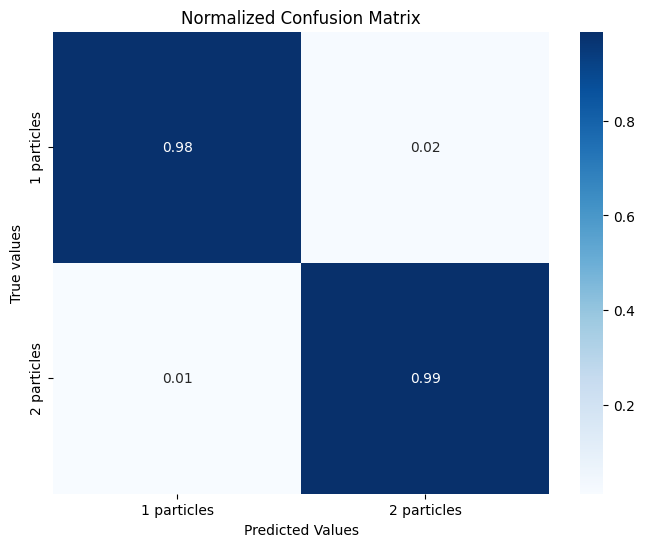

In [64]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=["1 particles", "2 particles"],
            yticklabels=["1 particles", "2 particles"])
plt.xlabel('Predicted Values')
plt.ylabel('True values')
plt.title('Normalized Confusion Matrix')
plt.savefig('confusion_matrix.png', dpi=200)
plt.show()

Loss:

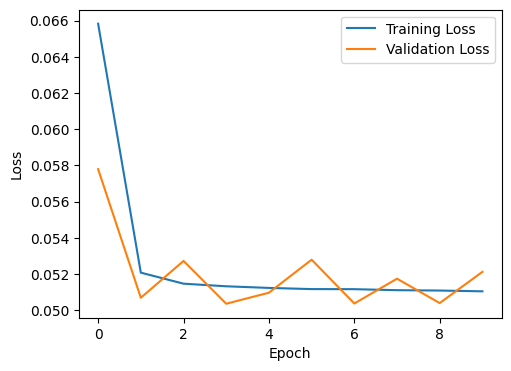

In [65]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_graph.png', dpi=200)
plt.legend()

Accuracy:

In [66]:
accuracy = accuracy_score(y_test, y_pred_classes)

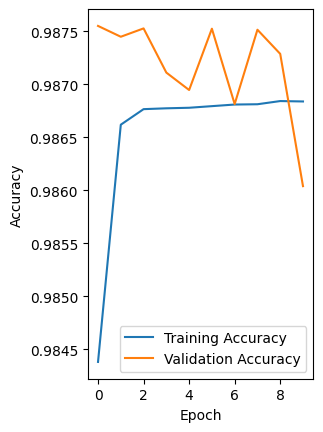

In [67]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_graph.png', dpi=200)
plt.legend()

ROC curve:

In [68]:
y_pred_prob = y_pred[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

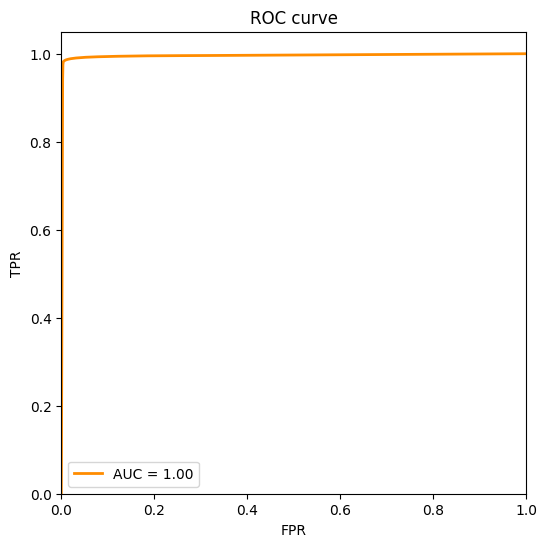

In [69]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr,color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.savefig('roc_curve.png', dpi=200)
plt.show()